In [1]:
# prediction of market price based on news headlines

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 2 stage Model, firstly using NLP + regression:

Upload the datasets

In [3]:
# upload the files
df1 = pd.read_csv('Combined_News_DJIA.csv')
df2 = pd.read_csv('upload_DJIA_table.csv')
df1.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


In [4]:
df2.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


####  USING NLP ON THE DF1 DATASET, WE TRY TO PREDICT HOW MARKET WILL GO, BASED ON NEWS HEADLINES

In [6]:
# adding all of our regression models to work with

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 

In [7]:
# metrics:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
import itertools

In [8]:
# NLP 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sushi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


we created a new df for working

In [9]:
df3 = df1

In [11]:
df3

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [14]:
# Split the dataset
train = df3[df3['Date'] < '20150701']
test = df3[df3['Date'] > '20150701']

In [15]:
train

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [16]:
test

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1863,2016-01-04,0,Saudi Arabia breaks off ties with Iran - Amid ...,Exclusive: UK Government urged to reveal its r...,China halts trading as stocks fall 7%,Earthquake measuring 6.8 magnitude strikes India,A virus linked to shrinking newborns brains is...,"New photos of SpaceX booster show sooty, but u...",Indian consulate in Afghanistan under attack b...,Iran calls off Major Hajj,...,Iranian leaders website posts controversial im...,"After Bahrain, Sudan expels Iranian ambassador...",Saudi Arabia to cut off all air traffic with I...,Hezbollah sets off large border bomb targeting...,Iranian diplomats given 48 hours to leave Saud...,BBC News: Migrant crisis: Sweden border checks...,Teachers claim the politics of austerity is le...,The Aftermath of a Muslim Cleric's Execution i...,Iran: 40 arrested for attack on Saudi embassy,"Oil prices jump over 2 pct on Saudi Arabia, Ir..."
1864,2016-01-05,1,"Dutch government backs strong encryption, cond...",ISIS Militants Strap Bomb on 4 Year-Old Boy an...,Canada proceeding with controversial $15-billi...,Brazil is heading for its worst recession sinc...,British ISIS militant's desperate plea for doc...,Malaysia's schools will start holding anti-ISI...,Saudi Arabia omitted from UK death penalty str...,ISIS executes first female journalist. One of ...,...,'Fat cat Tuesday' as top bosses pay overtakes ...,"""The United Nations special rapporteur for hum...",Merkel rejects Bavarian bid for refugee limit:...,Yemen centre for blind 'hit in Saudi coalition...,Mass murderer Anders Behring Breiviks court ca...,Kuwait has recalled its ambassador to Iran in ...,Britain set for first mass strike by doctors i...,First known hacker-caused power outage signals...,Kuwait becomes latest Saudi ally to downgrade ...,'Do Your Cars Emit Oxygen?' Indian Supreme Cou...
1865,2016-01-06,0,China shuts down stock market after 15 min 7% ...,Armed suspect shot dead after trying to storm ...,Oil price falls below $35 a barrel to fresh 11...,Germans outraged by mayors advice for women af...,German public broadcaster ZDF has apologised f...,Iran accuses Saudis of bombing their embassy i...,Protesters demand Canada cancel $15B Saudi con...,"'Snooper's charter' will cost British lives, M...",...,Rio Olympic stadium has no water or electricit...,Saudi-led air strikes in Yemen hit centre for ...,Truck bomb kills 65 at Libyan police training ...,Israeli Tourists on Tour Bus Attacked by Maske...,Israel and China have signed a document of und...,Donald Trump threatens to pull 700m investment...,Israel busts Hamas terror cell planning abduct...,A working hospital in central China was demoli...,Paris to close Champs Elysees to cars one Sund...,TransCanada Corp files US$15-billion lawsuit a...
1866,2016-01-07,0,Reports of sexual assaults on women across Eur...,Shelter forcibly converted children to Christi...,Iran Has Banned Its Citizens from Making Pilgr...,Gaddafi warned Blair his ousting would 'open d...,A Turkish firm has been selling fake life vest...,German minister says deportations possible in ...,Mao statue in China 'pulled down by authoritie...,A poacher-hunting dog in South Africa has been...,...,Charlie Hebdo anniversary: free-speech groups ...,Polish president signs bill putting state medi...,Mein Kampf hits stores in tense Germany,"Morocco Bans WhatsApp, Skype, Viber and Other ...",The UN library announced its most-checked-out ...,One third of the worlds freshwater fish are at...,"Nuclear weapons risk greater than in cold war,...","North Korea Claims That It Tested the ""H-Bomb ...",UK - DWP told woman she was not ill enough for...,Venezuela's new parliament removes pictures of...
1867,2016-01-08,0,El Chapo' Being Taken to Same Prison He Escape...,El Chapo has been caught,At least 231 children abused at Catholic boys ...,North Korea has defended its latest nuclear te...,A group of United Nations' experts

In [17]:
# Removing punctuations
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True) 

In [18]:
# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,...,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,...,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...
3,b U S refuses Israel weapons to attack Iran ...,b When the president ordered to attack Tskhinv...,b Israel clears troops who killed Reuters cam...,b Britain s policy of being tough on drugs is...,b Body of year old found in trunk Latest ...,b China has moved million quake survivors...,b Bush announces Operation Get All Up In Russi...,b Russian forces sink Georgian ships,b The commander of a Navy air reconnaissance s...,b of CNN readers Russia s actions in Geor...,...,b Elephants extinct by,b US humanitarian missions soon in Georgia i...,b Georgia s DDOS came from US sources,b Russian convoy heads into Georgia violating...,b Israeli defence minister US against strike ...,b Gorbachev We Had No Choice,b Witness Russian forces head towards Tbilisi...,b Quarter of Russians blame U S for conflict...,b Georgian president says US military will ta...,b Nobel laureate Aleksander Solzhenitsyn...
4,b All the experts admit that we should legalis...,b War in South Osetia pictures made by a ...,b Swedish wrestler Ara Abrahamian throws away ...,b Russia exaggerated the death toll in South O...,b Missile That Killed Inside Pakistan May Ha...,b Rushdie Cond

In [19]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,...,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge


In [22]:
# headlines = []
# for row in range(0,len(data.index)):
#     headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

# headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [31]:
#combining all the news headlines into a single line
headlines = []

for row in range(0, len(data.index)):
  headlines.append(' '.join( str(x) for x in data.iloc[row, 0:25]))

headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [41]:
clean_headlines = []

for headline in headlines:
    clean_headline = re.sub(r"b\s*('[^']*'|\"[^\"]*\")", '', headline)  # remove 'b' followed by single or double quotes
    clean_headline = re.sub(r"b\s*", '', clean_headline)  # remove 'b'
    clean_headline = re.sub(r"\'", '', clean_headline)  # remove all single quotes
    clean_headlines.append(clean_headline.strip())  # remove leading/trailing whitespace

clean_headlines[0]


'georgia  downs two russian warplanes  as countries move to rink of war  reaking  musharraf to e impeached   russia today  columns of troops roll into south ossetia  footage from fighting  youtue   russian tanks are moving towards the capital of south ossetia  which has reportedly een completely destroyed y georgian artillery fire  afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  russian tanks have entered south ossetia whilst georgia shoots down two russian jets   reaking  georgia invades south ossetia  russia warned it would intervene on so s side  the  enemy comatent  trials are nothing ut a sham  salim haman has een sentenced to       years  ut will e kept longer anyway just ecause they feel like it   georgian troops retreat from s  osettain capital  presumaly leaving several hundred people killed   video   did the u s  prep georgia for war with russia   rice gives green light for israel to attack iran  says u

In [42]:
train['headlines'] = clean_headlines
train_headlines = clean_headlines

C:\Users\sushi\AppData\Local\Temp\ipykernel_2228\3411934494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['headlines'] = clean_headlines


In [43]:
selected_categories = ['headlines']

In [44]:
# IMPLEMENT THE BAG OF WORDS

In [45]:
# Implement BAG OF WORDS
countvector = CountVectorizer(ngram_range=(2,2))
train_dataset_cv = countvector.fit_transform(clean_headlines)

In [46]:
# implement RandomForest Classifier
rf=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf.fit(train_dataset_cv,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [47]:
# implement Multinomial Naive Bayes
nb=MultinomialNB()
nb.fit(train_dataset_cv,train['Label'])

MultinomialNB()

In [48]:
# implement Logestic Regression
lr=LogisticRegression()
lr.fit(train_dataset_cv,train['Label'])

LogisticRegression()

In [49]:
# implement K-Nearest Neighbor
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn.fit(train_dataset_cv,train['Label'])

KNeighborsClassifier()

In [50]:
# implement Support vector classifier
svm = SVC(kernel='linear', random_state=0)  
svm.fit(train_dataset_cv,train['Label'])

SVC(kernel='linear', random_state=0)

In [60]:
# Transform Test dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_headlines = test_transform
test_dataset_cv = countvector.transform(test_transform)

test_dataset_cv = countvector.transform(test_transform)

In [57]:
test_headlines

['Saudi Arabia breaks off ties with Iran - Amid row over Saudi execution of Shia cleric Exclusive: UK Government urged to reveal its role in getting Saudi Arabia onto UN Human Rights Council | Liberal Democrat and Green Party leaders call on David Cameron to reveal whether British government supported Saudi bid China halts trading as stocks fall 7% Earthquake measuring 6.8 magnitude strikes India A virus linked to shrinking newborns brains is spreading rapidly beyond Brazil (epidemic of Zika virus suspected) New photos of SpaceX booster show sooty, but undamaged rocket Indian consulate in Afghanistan under attack by gunmen Iran calls off Major Hajj Denmark responds to Swedish border checks with own controls. "If the European Union cannot protect the external border you will see more and more countries forced to introduce temporary border controls." - Danish PM David Cameron criticised for turning \'blind eye\' to mass executions in Saudi Arabia Denmark introduces temporary controls alo

## PREDICTIONS FOR ALL THE DIFFERENT REFRESSION MODELS

In [61]:
# Prediciton RandomForest Classifier
predictions_rf_cv = rf.predict(test_dataset_cv)

In [62]:
# CV-RF
matrix_rf_cv=confusion_matrix(test['Label'],predictions_rf_cv)
print(matrix_rf_cv)
score_rf_cv=accuracy_score(test['Label'],predictions_rf_cv)
print(score_rf_cv)
report_rf_cv=classification_report(test['Label'],predictions_rf_cv)
print(report_rf_cv)

[[ 1 55]
 [ 1 69]]
0.5555555555555556
              precision    recall  f1-score   support

           0       0.50      0.02      0.03        56
           1       0.56      0.99      0.71        70

    accuracy                           0.56       126
   macro avg       0.53      0.50      0.37       126
weighted avg       0.53      0.56      0.41       126



In [63]:
# Prediciton Multinomial Naive Bayes
predictions_nb_cv = nb.predict(test_dataset_cv)

In [64]:
# CV-NB
matrix_nb_cv=confusion_matrix(test['Label'],predictions_nb_cv)
print(matrix_nb_cv)
score_nb_cv=accuracy_score(test['Label'],predictions_nb_cv)
print(score_nb_cv)
report_nb_cv=classification_report(test['Label'],predictions_nb_cv)
print(report_nb_cv)

[[12 44]
 [11 59]]
0.5634920634920635
              precision    recall  f1-score   support

           0       0.52      0.21      0.30        56
           1       0.57      0.84      0.68        70

    accuracy                           0.56       126
   macro avg       0.55      0.53      0.49       126
weighted avg       0.55      0.56      0.51       126



In [65]:
# Prediciton Logestic Regression
predictions_lr_cv = lr.predict(test_dataset_cv)

In [66]:
# CV-LR
matrix_lr_cv=confusion_matrix(test['Label'],predictions_lr_cv)
print(matrix_lr_cv)
score_lr_cv=accuracy_score(test['Label'],predictions_lr_cv)
print(score_lr_cv)
report_lr_cv=classification_report(test['Label'],predictions_lr_cv)
print(report_lr_cv)

[[26 30]
 [21 49]]
0.5952380952380952
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        56
           1       0.62      0.70      0.66        70

    accuracy                           0.60       126
   macro avg       0.59      0.58      0.58       126
weighted avg       0.59      0.60      0.59       126



In [67]:
# Prediciton K-Nearest Neighbor
predictions_knn_cv = knn.predict(test_dataset_cv)

In [68]:
# CV-KNN
matrix_knn_cv=confusion_matrix(test['Label'],predictions_knn_cv)
print(matrix_knn_cv)
score_knn_cv=accuracy_score(test['Label'],predictions_knn_cv)
print(score_knn_cv)
report_knn_cv=classification_report(test['Label'],predictions_knn_cv)
print(report_knn_cv)

[[ 2 54]
 [ 5 65]]
0.5317460317460317
              precision    recall  f1-score   support

           0       0.29      0.04      0.06        56
           1       0.55      0.93      0.69        70

    accuracy                           0.53       126
   macro avg       0.42      0.48      0.38       126
weighted avg       0.43      0.53      0.41       126



In [69]:
# Prediciton Support vector classifier
predictions_svm_cv = svm.predict(test_dataset_cv)

In [70]:
# CV-SVM
matrix_svm_cv=confusion_matrix(test['Label'],predictions_svm_cv)
print(matrix_svm_cv)
score_svm_cv=accuracy_score(test['Label'],predictions_svm_cv)
print(score_svm_cv)
report_svm_cv=classification_report(test['Label'],predictions_svm_cv)
print(report_svm_cv)

[[26 30]
 [23 47]]
0.5793650793650794
              precision    recall  f1-score   support

           0       0.53      0.46      0.50        56
           1       0.61      0.67      0.64        70

    accuracy                           0.58       126
   macro avg       0.57      0.57      0.57       126
weighted avg       0.57      0.58      0.58       126



# CONFUSION MATRICES PLOTS 

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


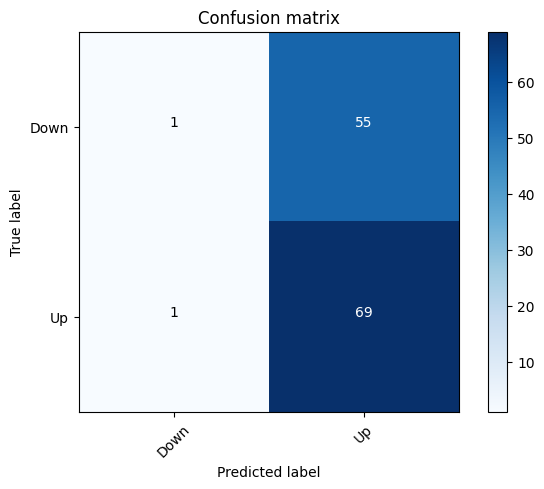

In [75]:
# Plot Confusion_Matrix RandomForest Classifier
plot_confusion_matrix(matrix_rf_cv, classes=['Down', 'Up'])

Confusion matrix, without normalization


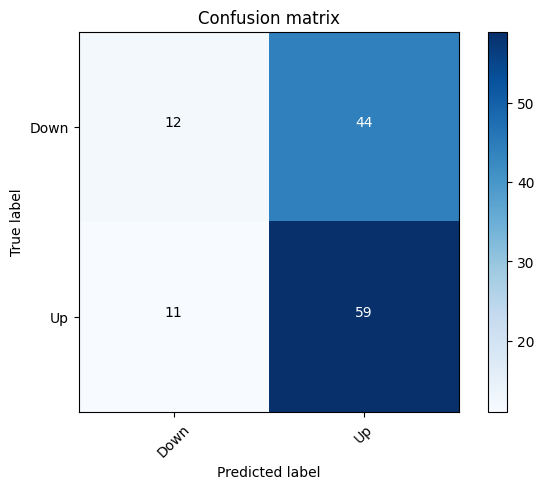

In [76]:
# Plot Confusion_Matrix Multinomial Naive Bayes
plot_confusion_matrix(matrix_nb_cv, classes=['Down', 'Up'])

Confusion matrix, without normalization


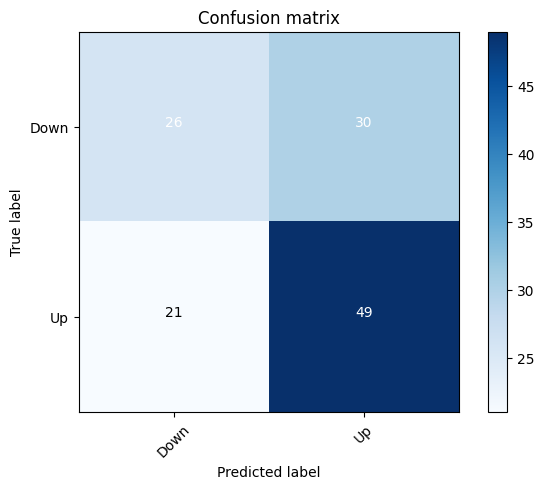

In [77]:
# Plot Confusion_Matrix Logestic Regression
plot_confusion_matrix(matrix_lr_cv, classes=['Down', 'Up'])

Confusion matrix, without normalization


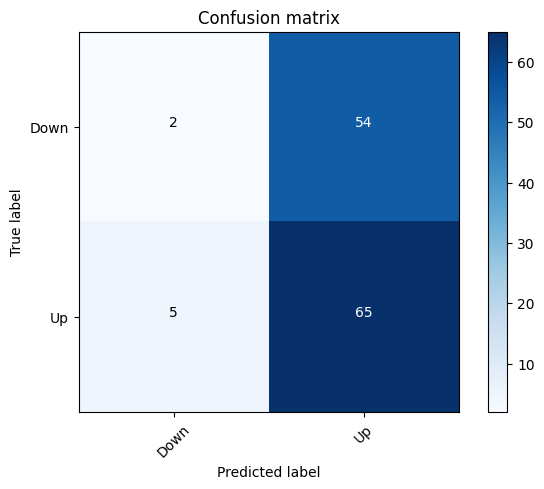

In [78]:
# Plot Confusion_Matrix K-Nearest Neighbor
plot_confusion_matrix(matrix_knn_cv, classes=['Down', 'Up'])

Confusion matrix, without normalization


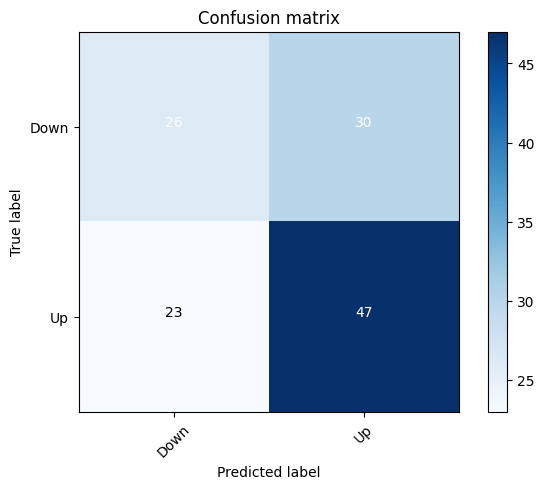

In [79]:
# Plot Confusion_Matrix Support vector classifier
plot_confusion_matrix(matrix_svm_cv, classes=['Down', 'Up'])

# NOW THE METHOD TWO, USING THE OTHER DATASET WITH STOCK PRICINGS USING 

### VaderSentiment's SentimentIntensity Analyzer

In [81]:
df1.shape

(1989, 27)

In [82]:
df2.shape

(1989, 7)

In [83]:
df1.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [84]:
df2.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [85]:
# Merge the datasets 
merge = df1.merge(df2, how = 'inner', on='Date')

In [86]:
merge.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [87]:
#combining all the news headlines into a single line
headlines = []

for row in range(0, len(merge.index)):
  headlines.append(' '.join( str(x) for x in merge.iloc[row, 2:27]))

headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

###  DATA CLEANING

In [88]:
# now we clean the headlines
clean_headlines = []

for i in range(0, len(headlines)):
  clean_headlines.append( re.sub("b[(')]", '', headlines[i])) # remove all the b' with an empty string
  clean_headlines[i] = re.sub('b[(")]', '', clean_headlines[i]) # remove all  the b"
  clean_headlines[i] = re.sub("\'", '', clean_headlines[i]) # remove all  the b"

In [89]:
# a look at the cleaned dataset
clean_headlines[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [90]:
# we add it to our main dataset
merge['combined_news'] = clean_headlines
merge['combined_news']

0       Georgia downs two Russian warplanes as countri...
1       Why wont America and Nato help us? If they won...
2       Remember that adorable 9-year-old who sang at ...
3        U.S. refuses Israel weapons to attack Iran: r...
4       All the experts admit that we should legalise ...
                              ...                        
1984    Barclays and RBS shares suspended from trading...
1985    2,500 Scientists To Australia: If You Want To ...
1986    Explosion At Airport In Istanbul Yemeni former...
1987    Jamaica proposes marijuana dispensers for tour...
1988    A 117-year-old woman in Mexico City finally re...
Name: combined_news, Length: 1989, dtype: object

In [91]:
merge.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,combined_news
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...


### Subjectivity and Polarity 

In [92]:
# Now a function for subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# And a function for polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [93]:
# Now we create two new columns for subjectivity and polarity

In [94]:
merge['subjectivity'] = merge['combined_news'].apply(getSubjectivity)
merge['polarity'] = merge['combined_news'].apply(getPolarity)

In [95]:
merge.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Volume,Adj Close,combined_news,subjectivity,polarity
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,All the experts admit that we should legalise ...,0.375099,0.040677


### Sentiment score


In [96]:
# a function to get the sentiment score 
def getSIA(text):      # get subjectivity Intensity Analyzer
   sia = SentimentIntensityAnalyzer()
   sentiment = sia.polarity_scores(text)
   return sentiment

In [97]:
from nltk.stem.snowball import NorwegianStemmer
# get the sentiment scores for each day
compound = []
pos = []
neg = []
neu = []
SIA = 0

for i in range(0, len(merge['combined_news'])):
  SIA = getSIA(merge['combined_news'][i])
  compound.append(SIA['compound'])
  pos.append(SIA['pos'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])

In [98]:
# store all these values in the merge dataset
merge['compound'] = compound
merge['positive'] = pos
merge['negative'] = neg
merge['neutral'] = neu

In [99]:
merge.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,combined_news,subjectivity,polarity,compound,positive,negative,neutral
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.041,0.235,0.724
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.089,0.191,0.721


In [100]:
# collapsing the dataset
keep_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'subjectivity', 'polarity', 'compound', 'positive', 'negative', 'neutral', 'Label']
df = merge[keep_cols]
df

,Open,High,Low,Close,Volume,subjectivity,polarity,compound,positive,negative,neutral,Label
0,11432.089844,11759.959961,11388.040039,11734.320312,212830000,0.267549,-0.048568,-0.9982,0.041,0.235,0.724,0
1,11729.669922,11867.110352,11675.530273,11782.349609,183190000,0.374806,0.121956,-0.9858,0.089,0.191,0.721,1
2,11781.700195,11782.349609,11601.519531,11642.469727,173590000,0.536234,-0.044302,-0.9715,0.056,0.128,0.816,0
3,11632.809570,11633.780273,11453.339844,11532.959961,182550000,0.364021,0.011398,-0.9809,0.066,0.146,0.788,0
4,11532.070312,11718.280273,11450.889648,11615.929688,159790000,0.375099,0.040677,-0.9882,0.094,0.189,0.717,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1984,17355.210938,17355.210938,17063.080078,17140.240234,138740000,0.352311,-0.014015,-0.9644,0.094,0.148,0.758,0
1985,17190.509766,17409.720703,17190.509766,17409.720703,112190000,0.352649,0.046560,-0.9571,0.102,0.132,0.767,1
1986,17456.019531,17704.509766,17456.019531,17694.679688,106380000,0.389617,0.052622,-0.9975,0.091,0.225,0.684,1
1987,17712.759766,17930.609375,17711.800781,17929.990234,133030000,0.382566,0.011243,-0.9977,0.061,0.202,0.738,1


In [101]:
X = df
X = np.array(X.drop(['Label'], 1))
# Create the target dataset
y = np.array(df['Label'])

C:\Users\sushi\AppData\Local\Temp\ipykernel_2228\3459337847.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(X.drop(['Label'], 1))


In [102]:
y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

### Splitting the datasets

In [103]:
# split the data for training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Training

In [104]:
# Train and predict
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [105]:
predictions = LDA.predict(X_test)

In [106]:
predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [107]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,

# CLASSIFICATION REPORT

In [108]:
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       193
           1       0.86      0.97      0.91       205

    accuracy                           0.90       398
   macro avg       0.91      0.90      0.90       398
weighted avg       0.91      0.90      0.90       398



## A commendable accuracy of 90%

## Confusion Matrix 

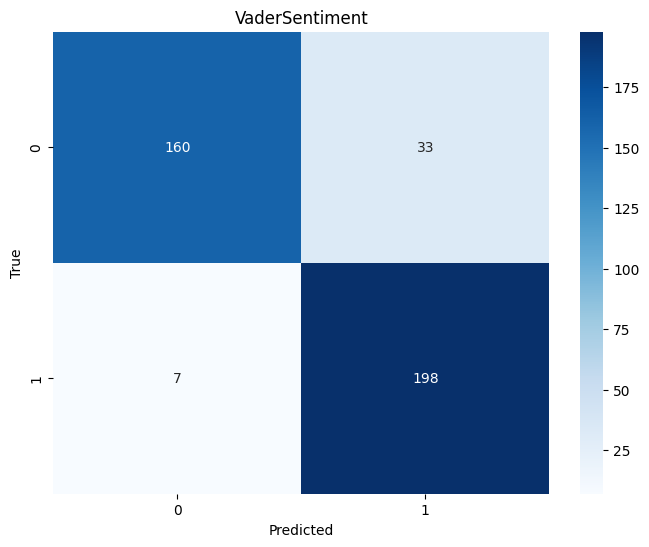

In [111]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VaderSentiment')
plt.show()

# END